In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG, display, HTML
from graphviz import Source
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier

Задание 1

Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

In [3]:
mushroom_train = pd.read_csv('training_mush.csv')
mushroom_test = pd.read_csv('testing_mush.csv')

In [4]:
mushroom_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [5]:
y = mushroom_train.get('class')
X = mushroom_train.drop('class', axis = 1)

In [6]:
np.random.seed(0)
clf_rf = RandomForestClassifier()

In [7]:
parameters = {'n_estimators' : range (10, 50, 10),
              'max_depth' : range(1, 12, 2),
              'min_samples_leaf' : range(1,7),
              'min_samples_split' : range(2, 9, 2)}

In [8]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 3, n_jobs = -1)

In [9]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [10]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [11]:
best_clf = grid_search_cv_clf.best_estimator_

In [12]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features' :list(X),
                                       'feature_importances' : feature_importances})
feature_importances_df.sort_values('feature_importances', ascending = False) 

,features,feature_importances
4,odor,0.178612
19,spore-print-color,0.095079
7,gill-size,0.079868
8,gill-color,0.079614
20,population,0.075672
3,bruises,0.073724
18,ring-type,0.067532
12,stalk-surface-below-ring,0.066249
10,stalk-root,0.059747
6,gill-spacing,0.058694


Задание 2 

Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

In [13]:
mushroom_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [14]:
predictions= best_clf.predict(mushroom_test)

In [15]:
predictions.sum()

976

In [16]:
y_true = pd.read_csv('testing_y_mush.csv')

In [17]:
y_true.head()

,class
0,0
1,0
2,1
3,1
4,1


In [18]:
a = confusion_matrix(y_true, predictions)

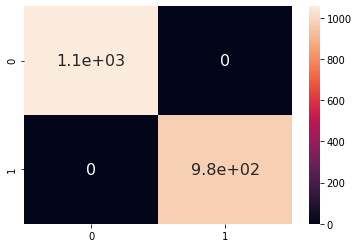

In [19]:
sns.heatmap(a, annot=True,annot_kws={"size": 16})

Задание 3

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

In [20]:
invasion_train = pd.read_csv('invasion.csv')
invasion_test = pd.read_csv('operative_information.csv')

In [21]:
invasion_train.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [22]:
X = invasion_train.drop('class', axis = 1)
y = invasion_train.get('class')

In [23]:
np.random.seed(0) 
rf_inv_clf = RandomForestClassifier()

In [24]:
parameters = {'n_estimators' : range (10, 50, 10),
              'max_depth' : range(1, 12, 2),
              'min_samples_leaf' : range(1,7),
              'min_samples_split' : range(2, 9, 2)}

In [25]:
grid_search_cv_rf_inv_clf = GridSearchCV(rf_inv_clf, parameters, cv = 3, n_jobs = -1)

In [26]:
grid_search_cv_rf_inv_clf.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [27]:
best_clf_inv = grid_search_cv_rf_inv_clf.best_estimator_

In [28]:
prediction = best_clf_inv.predict(invasion_test)

In [29]:
pd.Series(prediction).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [30]:
feature_importances = best_clf_inv.feature_importances_
feature_importances_df = pd.DataFrame({'features' :list(X),
                                       'feature_importances' : feature_importances})
feature_importances_df.sort_values('feature_importances', ascending = False) 

,features,feature_importances
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


In [31]:
dang_space_df = pd.read_csv('space_can_be_a_dangerous_place.csv')

In [32]:
dang_space_df

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [33]:
# sns.heatmap(dang_space_df)

In [34]:
iris = pd.read_csv('iris.csv')

In [39]:
%%timeit
a = iris.apply('mean')

210 µs ± 3.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
%%timeit
b = iris.mean(axis=0)

146 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [41]:
%%timeit
c = iris.describe().loc['mean']

10.6 ms ± 96.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
%%timeit
d =iris.apply(np.mean)

910 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
